In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

data = fetch_california_housing()
in_data = StandardScaler().fit_transform(data.data)
x_data, tt_x, y_data, tt_y = train_test_split(in_data, data.target, random_state = 42)
t_x, v_x, t_y, v_y = train_test_split(x_data, y_data, random_state = 42, test_size = 0.2)

t_x.shape[1:]  # 입력 데이터의 차원의 형상

(8,)

In [5]:
m = keras.models.Sequential()
m.add(keras.layers.Flatten(input_shape = t_x.shape[1:]))
m.add(keras.layers.Dense(30, activation = 'relu'))
m.add(keras.layers.Dense(1))
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 30)                270       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


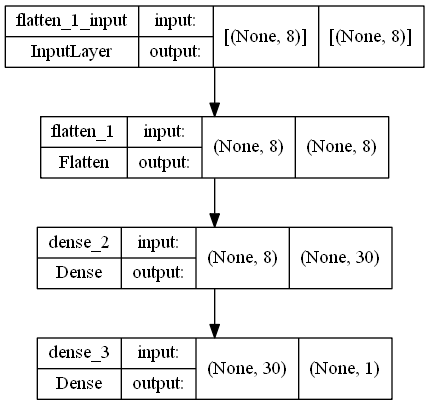

In [8]:
keras.utils.plot_model(m, 'm.png', show_shapes = True)

In [9]:
m.compile(optimizer = keras.optimizers.SGD(learning_rate = 1e-3), loss = 'mean_squared_error')
hy = m.fit(t_x, t_y, validation_data = (v_x, v_y), epochs = 20)
t_hy = m.evaluate(tt_x, tt_y)

Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 1.8849 - val_loss: 0.9229
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 0.8487 - val_loss: 0.6999
Epoch 3/20
387/387 [==============================] - 1s 2ms/step - loss: 0.7132 - val_loss: 0.6389
Epoch 4/20
387/387 [==============================] - 0s 1ms/step - loss: 0.6635 - val_loss: 0.6023
Epoch 5/20
387/387 [==============================] - 0s 808us/step - loss: 0.6299 - val_loss: 0.5745
Epoch 6/20
387/387 [==============================] - 0s 798us/step - loss: 0.6035 - val_loss: 0.5526
Epoch 7/20
387/387 [==============================] - 0s 812us/step - loss: 0.5814 - val_loss: 0.5347
Epoch 8/20
387/387 [==============================] - 0s 818us/step - loss: 0.5631 - val_loss: 0.5199
Epoch 9/20
387/387 [==============================] - 0s 859us/step - loss: 0.5484 - val_loss: 0.5072
Epoch 10/20
387/387 [==============================] - 0s 898us/step - loss: 0.5355 - val_

No handles with labels found to put in legend.


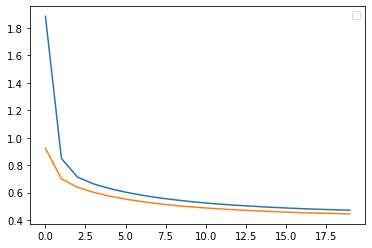

In [13]:
plt.plot(pd.DataFrame(hy.history))
# 손실이 0으로 수렴하지 않고 0.5 근처에서 유지되고 있음
# 제대로 학습이 안되고 있음

In [14]:
tt_x[:3]

array([[-1.15248922, -0.2891866 , -0.49989596, -0.15697642, -0.02956174,
         0.07768129,  0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 ,  0.20430076,  0.12320645,
        -0.03763415, -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 ,  0.1882305 , -0.1019721 ,
        -0.164679  ,  1.01509336, -1.43265267]])

In [15]:
tt_y[:3]

array([0.477  , 0.458  , 5.00001])

In [16]:
m.predict(tt_x[:3])

array([[0.68847674],
       [1.4980192 ],
       [2.9209414 ]], dtype=float32)